<!--NOTEBOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="./figures/LogoOpenclassrooms.png">
<font size="4">
    
Cette étude a été réalisée dans le cadre du 6ème projet de ma formation Datascientist dispensée en MOOC par 

<font color='blus'>Openclassrooms / écoles Centrale-Supélec</font>.




<p></p><p></p><p></p>





**Le problème posé :**

# <font color='blus'>Indexation d'images</font>

Vous êtes bénévole pour l'association de protection des animaux de votre quartier. C'est d'ailleurs ainsi que vous avez trouvé votre compagnon idéal, Snooky. Du coup, vous vous demandez ce que vous pouvez faire en retour pour aider l'association.

Vous apprenez, en discutant avec un bénévole, que leur base de données de pensionnaires commence à s'agrandir et qu'ils n'ont pas toujours le temps de référencer les images des animaux qu'ils ont accumulées depuis plusieurs années. Ils aimeraient donc réaliser un index de l’ensemble de la base de données d’images qu’ils possèdent, pour classer les chiens par races.

**<font color='blus'>Les données</font>**

Les bénévoles de l'association n'ont pas eu le temps de réunir les différentes images des pensionnaires dispersées sur leurs disques durs. Pas de problème, vous développerez un algorithme en utilisant le Stanford Dogs Dataset pour entraîner votre algorithme.

**<font color='blus'>Votre mission</font>**

En tant que Data Scientist, l'association vous demande de réaliser un algorithme de détection de la race du chien sur une photo, afin d'accélérer leur travail d’indexation.

**<font color='blus'>Contraintes</font>**

Lors de ce projet, vous mettrez en œuvre deux approches.

* Une approche classique : il s’agit de pre-processer des images avec des techniques spécifiques (e.g.whitening, equalisation, filtre linéaire/laplacien/gaussien, éventuellement modifier la taille des images), puis d’extraire des features (e.g. texture, corners, edges et SIFT detector). Il faut ensuite réduire les dimensions, soit par des approches classiques (e.g. PCA, k-means) soit avec une approche par histogrammes et dictionary learning (bag-of-words appliqué aux images), puis appliquer des algorithmes de classification standards.



* Lors de l’analyse exploratoire, vous regarderez si les features extraites et utilisées en classification sont prometteuses en utilisant des méthodes de réduction de dimension pour visualiser le dataset en 2D. Cela vous permettra d’affiner votre intuition sur les différents traitements possibles, sans que cela ne se substitue à des mesures de performances rigoureuses.



* Une approche s’appuyant sur l’état de l’art et l’utilisation de CNN (réseaux de neurones convolutionnels). Compte tenu de la taille et de la complexité du dataset, et de la puissance de calcul à votre disposition, il est très difficile d’obtenir de bonnes performances (pour ça, essayez MNIST). Aussi, est-il recommandé d’utiliser le transfer learning, c’est-à-dire utiliser un réseau déjà entraîné, et le modifier pour répondre à votre problème. Une première chose obligatoire est de ré-entraîner les dernières couches pour prédire les classes qui vous intéressent seulement. Il est également possible d’adapter la structure (supprimer certaines couches par exemple) ou de ré-entraîner le modèle avec un très faible learning rate pour ajuster les poids à votre problème (plus long) et optimiser les performances.

In [42]:
from IPython.display import display, clear_output


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import P7_DataBreed
import p5_util

from  sklearn import model_selection
import numpy as np

%load_ext autoreload
%autoreload 2
%reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import P7_DataBreed
if True :
    oP7_DataBreed = P7_DataBreed.update_object_save(oP7_DataBreed, is_saved=False,is_new_attribute=False)
oP7_DataBreed.show()


 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 0
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : (368, 3)
y train size .................. : (368, 3)
X test size ................... : (93, 3)
y test size ................... : (93, 3)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (461, 3)
Encoded labels from dataset ... : (461, 3)
Number of breeds in sample .... : 3
Image splitted ................ : False
Key point descriptors ......... : (30949, 128)
Classifier name ............... : Linear SVC
Supported classifiers ......... : ['Bernoulli NB', 'Random Forest', 'L.R. + multinomial', 'Gaussian NB', 'Linear SVC', 'KR Classifier']
Number of restricted images ... : 0

# <font color='blus'>1. Building data model </font>

* Data-model configuration is set.
* Breeds to be loaded is defined


In [2]:
import P7_DataBreed

oP7_DataBreed=P7_DataBreed.P7_DataBreed('./data/Images')
oP7_DataBreed.std_size=None
oP7_DataBreed.is_squarred=False
oP7_DataBreed.is_kp_filtered=False
is_splitted=False
oP7_DataBreed.split_ratio=(3,3)
list_dirbreed = ['n02107142-Doberman','n02115641-dingo','n02113978-Mexican_hairless']

## Retrieve number of classes
nClasses = len(list_dirbreed)
print("Number of classses= "+str(nClasses))


oP7_DataBreed.load(list_dirbreed=['n02107142-Doberman','n02115641-dingo','n02113978-Mexican_hairless'])
oP7_DataBreed.show()
oP7_DataBreed.show()
oP7_DataBreed.show_breed_name()

Number of classses= 3

 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : None
SIFT Image descriptors count .. : 0
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys([])
Current cluster model  ........ : 
Bag of features dataframe ..... : (0, 0)
Encoded labels from dataset ... : ()
Number of breeds in sample .... : 0
Image splitted ................ : False
Key point descriptors ......... : (128,)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Splitted parts ................ : (3, 3)
Dataframe images descriptors .. : 0 / Index([], dtype='object')
KP filtering .................. : F


* DataFrame with columns as images, breed names and labels is built.

* Labels are issued from encoding breed names. 

* Labels are then used for training Keras network. 


In [50]:
df = oP7_DataBreed.df_build()
df.label.unique(),df.shape

Image count = 461


(array([0, 1, 2]), (461, 3))

#### Building train and test sample, Keras compliant
<br>

* Train and test datasets are built in order to feed Keras based networks.

* Dataset is dumped in order to be used for all kinds of neurone networks

In [52]:
from keras.utils import to_categorical
import p5_util

import P7_DataBreed

ser_pil_image = df['image']
ser_label = df['label']

square = None
resize = (224,224)
test_size=0.1


arr_keras_image_train, arr_keras_image_test, arr_label_train, arr_label_test \
= P7_DataBreed.p7_keras_X_train_test_build(ser_pil_image, ser_label, test_size=test_size\
                                           , square=square, resize=resize)
print("*** "+str(arr_keras_image_train.shape))
# Data is standardized 
arr_keras_image_train = arr_keras_image_train.astype('float32')
arr_keras_image_test  = arr_keras_image_test.astype('float32')
arr_keras_image_train /= 255
arr_keras_image_test /= 255

# Targets are one-encoded thanks to Keras tools
arr_label_train = to_categorical(arr_label_train)
arr_label_test = to_categorical(arr_label_test)


filename='./data/arr_keras_X_y_train_test.dump'
p5_util.object_dump((arr_keras_image_train, arr_keras_image_test, arr_label_train, arr_label_test),filename)

Total images = 461
INFO : number of Image errors = 0
INFO : number of Label errors = 0
(461, 224, 224, 3) (461, 1)
*** (414, 224, 224, 3)


# <font color='blus'>0. Data is loaded and pre-processed </font>

In [10]:
import numpy as np
import p5_util

filename='./data/arr_keras_X_y_train_test.dump'
(X_train,X_test, y_train, y_test) = p5_util.object_load(filename)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

nClasses = y_train.shape[1]
print(nClasses)

dimData = np.prod(X_train.shape[1:])
print(dimData)

X_train = X_train.reshape(X_train.shape[0], dimData)
X_test  = X_test.reshape(X_test.shape[0], dimData)
print(X_train.shape)
print(X_test.shape)

p5_util.object_load : fileName= ./data/arr_keras_X_y_train_test.dump
(414, 224, 224, 3) (47, 224, 224, 3) (414, 3) (47, 3)
3
150528
(414, 150528)
(47, 150528)


# <font color='blus'>1. Breeds classification using Keras MLP model</font>

## <font color='blus'>1.2. MLP network is built </font>

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import optimizers

mlp_model = Sequential()
mlp_model.add(Dense(512, activation='relu', input_shape=(dimData,)))

mlp_model.add(Dense(512, activation='relu'))

mlp_model.add(Dense(nClasses, activation='softmax'))
sgd = optimizers.SGD(lr=5.e-4)

mlp_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

mlp_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               77070848  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1539      
Total params: 77,335,043
Trainable params: 77,335,043
Non-trainable params: 0
_________________________________________________________________


## <font color='blus'>1.3. MLP network is trained </font>

Batch size is 50

In [7]:
history = mlp_model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=50,
                    validation_data=(X_test,y_test))

Train on 414 samples, validate on 47 samples
Epoch 1/50
414/414 [==============================] - 4s 10ms/step - loss: 1.1386 - acc: 0.3768 - val_loss: 1.0770 - val_acc: 0.4894
Epoch 2/50
414/414 [==============================] - 3s 7ms/step - loss: 0.9951 - acc: 0.5000 - val_loss: 1.1132 - val_acc: 0.4255
Epoch 3/50
414/414 [==============================] - 3s 7ms/step - loss: 0.9801 - acc: 0.5435 - val_loss: 1.0768 - val_acc: 0.4468
Epoch 4/50
414/414 [==============================] - 3s 8ms/step - loss: 0.9135 - acc: 0.5628 - val_loss: 1.0407 - val_acc: 0.5319
Epoch 5/50
414/414 [==============================] - 4s 10ms/step - loss: 0.9312 - acc: 0.5121 - val_loss: 0.9823 - val_acc: 0.4894
Epoch 6/50
414/414 [==============================] - 4s 10ms/step - loss: 0.7974 - acc: 0.6787 - val_loss: 0.9296 - val_acc: 0.5532
Epoch 7/50
414/414 [==============================] - 4s 11ms/step - loss: 0.7973 - acc: 0.6449 - val_loss: 0.9455 - val_acc: 0.5319
Epoch 8/50
414/414 [=======

## <font color='blus'>1.4. Results are displayed </font>

47/47 [==============================] - 0s 1ms/step
Evaluation result on Test Data : Loss = 0.8140797995506449, accuracy = 0.6170212816684804


Text(0.5, 1.0, 'Accuracy Curves')

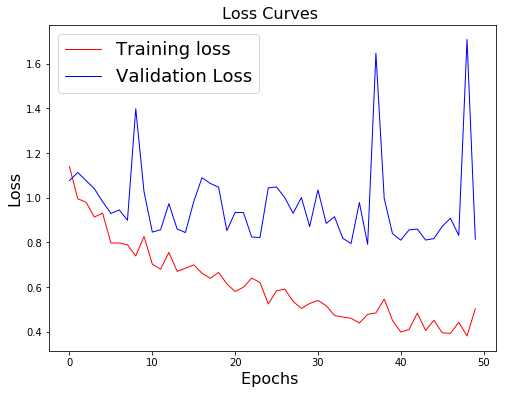

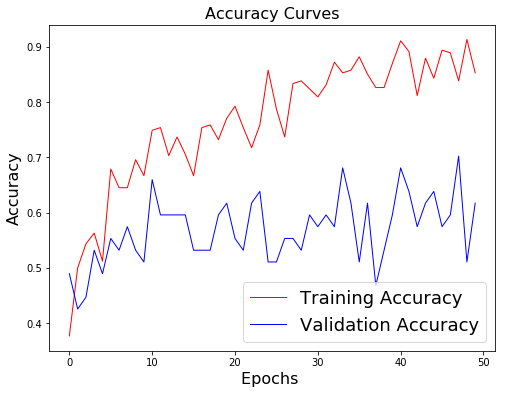

In [8]:
import matplotlib.pyplot as plt

[test_loss, test_acc] = mlp_model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=1.0)
plt.plot(history.history['val_loss'],'b',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves ',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=1.0)
plt.plot(history.history['val_acc'],'b',linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# <font color='blus'>2. Breeds classification regularized MLP model</font>

Regularization is gained with droping some neuron into first dense layers.

## <font color='blus'>2.2. MLP network is built droping neurons</font>

* Regularization consists in droping some neurones into layers.

In [11]:
from keras.regularizers import l1
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import optimizers

drop_ratio = 0.6

mlp_model_drop = Sequential()
mlp_model_drop.add(Dense(512, activation='relu', input_shape=(dimData,)))
mlp_model_drop.add(Dropout(drop_ratio))

mlp_model_drop.add(Dense(512, activation='relu'))
mlp_model_drop.add(Dropout(drop_ratio))

mlp_model_drop.add(Dense(nClasses, activation='softmax'))
sgd = optimizers.SGD(lr=5.e-4)

mlp_model_drop.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

mlp_model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               77070848  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1539      
Total params: 77,335,043
Trainable params: 77,335,043
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = mlp_model_drop.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=50,
                    validation_data=(X_test,y_test))

Train on 414 samples, validate on 47 samples
Epoch 1/50
414/414 [==============================] - 5s 11ms/step - loss: 1.4185 - acc: 0.3575 - val_loss: 1.2184 - val_acc: 0.3404
Epoch 2/50
414/414 [==============================] - 3s 8ms/step - loss: 1.2712 - acc: 0.3696 - val_loss: 1.1166 - val_acc: 0.3830
Epoch 3/50
414/414 [==============================] - 3s 7ms/step - loss: 1.1859 - acc: 0.3986 - val_loss: 1.0141 - val_acc: 0.4681
Epoch 4/50
414/414 [==============================] - 3s 7ms/step - loss: 1.1804 - acc: 0.3865 - val_loss: 0.9987 - val_acc: 0.4681
Epoch 5/50
414/414 [==============================] - 3s 7ms/step - loss: 1.1036 - acc: 0.4396 - val_loss: 1.0009 - val_acc: 0.4681
Epoch 6/50
414/414 [==============================] - 3s 7ms/step - loss: 1.0725 - acc: 0.4807 - val_loss: 1.0180 - val_acc: 0.5106
Epoch 7/50
414/414 [==============================] - 3s 7ms/step - loss: 1.0079 - acc: 0.4831 - val_loss: 1.0162 - val_acc: 0.4043
Epoch 8/50
414/414 [==========

## <font color='blus'>2.3. Results are displayed </font>

47/47 [==============================] - 0s 2ms/step
Evaluation result on Test Data : Loss = 0.9181672233216306, accuracy = 0.5744680927154866


Text(0.5, 1.0, 'Accuracy Curves')

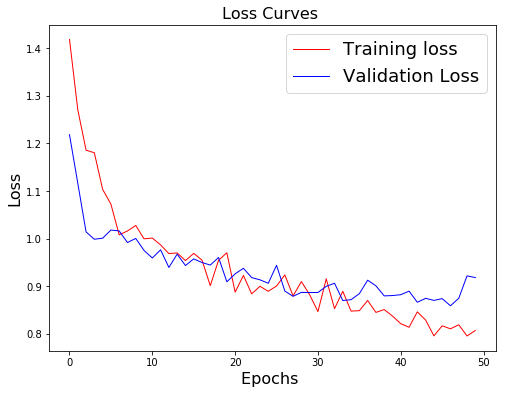

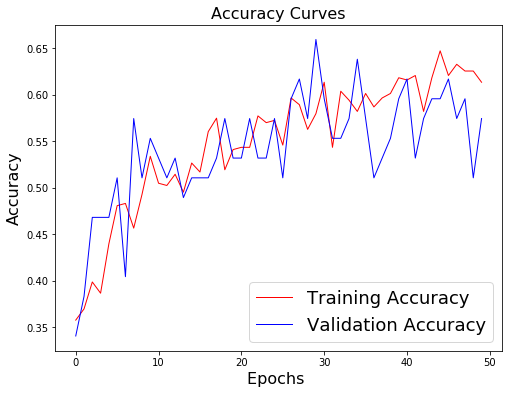

In [13]:
import matplotlib.pyplot as plt

[test_loss, test_acc] = mlp_model_drop.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=1.0)
plt.plot(history.history['val_loss'],'b',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves ',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=1.0)
plt.plot(history.history['val_acc'],'b',linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# <font color='blus'>3. Breeds classification with a L2 regularized MLP model</font>

Regularization is gained with Ridge regularization applied to cost function

## <font color='blus'>3.1. MLP network is built with L2 regularization</font>

* Regularization consists in droping some neurones into layers.

In [12]:
from keras.regularizers import l1
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import optimizers
reg = 1.e-4
mlp_model = Sequential()
mlp_model.add(Dense(512, activation='relu', input_shape=(dimData,),activity_regularizer=l2(reg)))

mlp_model.add(Dense(512, activation='relu', activity_regularizer=l2(reg)))

mlp_model.add(Dense(nClasses, activation='softmax'))
sgd = optimizers.SGD(lr=5.e-4)

mlp_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

mlp_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               77070848  
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 1539      
Total params: 77,335,043
Trainable params: 77,335,043
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = mlp_model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=50,
                    validation_data=(X_test,y_test))

Train on 414 samples, validate on 47 samples
Epoch 1/50
414/414 [==============================] - 3s 8ms/step - loss: 1.4975 - acc: 0.4082 - val_loss: 1.1695 - val_acc: 0.3830
Epoch 2/50
414/414 [==============================] - 3s 6ms/step - loss: 1.1074 - acc: 0.5604 - val_loss: 1.1156 - val_acc: 0.3617
Epoch 3/50
414/414 [==============================] - 3s 6ms/step - loss: 1.0548 - acc: 0.6063 - val_loss: 1.0688 - val_acc: 0.5745
Epoch 4/50
414/414 [==============================] - 3s 6ms/step - loss: 1.0215 - acc: 0.6715 - val_loss: 1.0586 - val_acc: 0.5319
Epoch 5/50
414/414 [==============================] - 3s 6ms/step - loss: 1.0082 - acc: 0.6691 - val_loss: 1.1095 - val_acc: 0.4468
Epoch 6/50
414/414 [==============================] - 3s 6ms/step - loss: 0.9873 - acc: 0.6643 - val_loss: 1.0631 - val_acc: 0.4894
Epoch 7/50
414/414 [==============================] - 3s 6ms/step - loss: 0.9777 - acc: 0.6812 - val_loss: 1.0549 - val_acc: 0.4894
Epoch 8/50
414/414 [===========

## <font color='blus'>3.2 Results are displayed </font>

47/47 [==============================] - 0s 1ms/step
Evaluation result on Test Data : Loss = 0.9405017114700155, accuracy = 0.5319149012261248


Text(0.5, 1.0, 'Accuracy Curves')

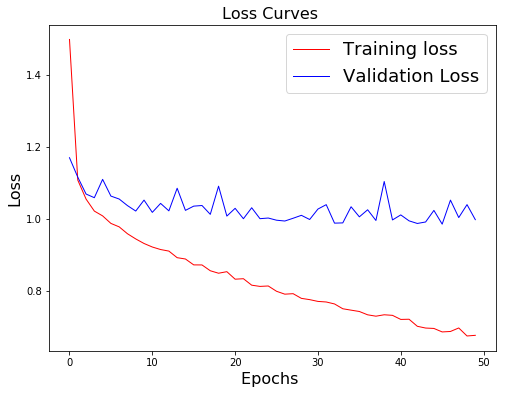

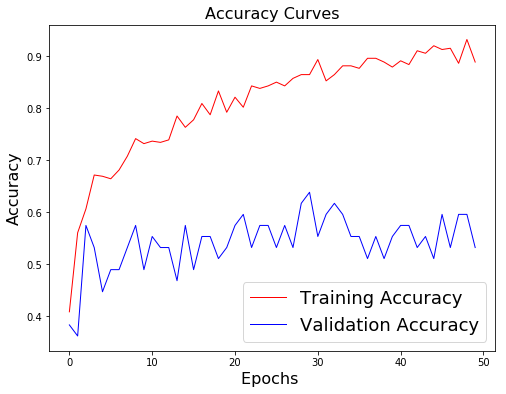

In [14]:
import matplotlib.pyplot as plt

[test_loss, test_acc] = mlp_model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=1.0)
plt.plot(history.history['val_loss'],'b',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves ',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=1.0)
plt.plot(history.history['val_acc'],'b',linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# <font color='blus'>4. Best MLP model is saved into `oDataBreed`</font>

In [24]:
import p5_util
import P7_DataBreed

filename = './data/oP7_DataBreed.dump'
oP7_DataBreed = p5_util.object_load(filename)
oP7_DataBreed.show()

p5_util.object_load : fileName= ./data/oP7_DataBreed.dump

 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 0
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : (368, 3)
y train size .................. : (368, 3)
X test size ................... : (93, 3)
y test size ................... : (93, 3)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (461, 3)
Encoded labels from dataset ... : (461, 3)
Number of breeds in sample .... : 3
Image splitted ................ : False
Key point descriptors ......... : (30949, 128)
Classifier name ............... : Linear SVC
Supported classifiers ......... : ['Bernoulli NB', 'Random Forest', 'L.R. + multinomial', 'Gaussian NB', 'Linear 

In [25]:
import p5_util
if False :
    filename= './data/mlp.dump'
    p5_util.object_dump(mlp_model_drop, filename)

In [33]:
import P7_DataBreed
oP7_DataBreed.mlp_model = mlp_model_drop
oP7_DataBreed.nn_model_name = 'mlp'
oP7_DataBreed.show()


 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 0
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : (368, 3)
y train size .................. : (368, 3)
X test size ................... : (93, 3)
y test size ................... : (93, 3)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (461, 3)
Encoded labels from dataset ... : (461, 3)
Number of breeds in sample .... : 3
Image splitted ................ : False
Key point descriptors ......... : (30949, 128)
Classifier name ............... : Linear SVC
Supported classifiers ......... : ['Bernoulli NB', 'Random Forest', 'L.R. + multinomial', 'Gaussian NB', 'Linear SVC', 'KR Classifier']
Number of restricted images ... : 0

# <font color='blus'>5. Test MLP predictions</font>

In [149]:
import P7_DataBreed

breedname = 'n02115641-dingo'

breedname_result, list_predicted, pil_image_requested = oP7_DataBreed.predict(breedname, 'n02115641_8871.jpg'\
                                                                              ,classifier_name = 'mlp')
print(list_predicted)


*** WARN : new attributes from copied_object are not             copied on target!

Image count = 1
INFO : number of Image errors = 0
INFO : number of Label errors = 0
150528
Top 3 :
['dingo', 'Mexican_hairless', 'Doberman']


In [26]:
import p5_util
if True :
    filename= './data/oP7_DataBreed.dump'
    p5_util.object_dump(oP7_DataBreed, filename)

*** ERROR : dumping into ./data/oP7_DataBreed.dump Error= Can't pickle <class 'P7_DataBreed.P7_DataBreed'>: it's not the same object as P7_DataBreed.P7_DataBreed
